In [74]:
import pandas as pd
import plotly.express as px


In [82]:
data = pd.read_csv('ecommerce_data.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Questions to analyze

Retention Analysis - How many Customers stayed and how many churned over time?

RFM Analysis - Recency, Frequency, Monetary

## Data Preprocessing

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [86]:
data.dropna(subset = ['CustomerID'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [88]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format = '%m/%d/%Y %H:%M')
data['CustomerID'] = data['CustomerID'].astype(int).astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [90]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [92]:
data['date_ymd'] = data['InvoiceDate'].dt.date.astype('datetime64[ns]')
data['year'] = data['InvoiceDate'].dt.year
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_ymd,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010


In [140]:
data['amount'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_ymd,year,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010,20.34


## 1.Retention Analysis

In [94]:
retention_data = data[['CustomerID','InvoiceNo', 'date_ymd']].drop_duplicates()
retention_data['date_ym'] = retention_data['date_ymd'].dt.to_period('M')
retention_data.head()

,CustomerID,InvoiceNo,date_ymd,date_ym
0,17850,536365,2010-12-01,2010-12
7,17850,536366,2010-12-01,2010-12
9,13047,536367,2010-12-01,2010-12
21,13047,536368,2010-12-01,2010-12
25,13047,536369,2010-12-01,2010-12


In [96]:
retention_data = retention_data.query('date_ymd <= "2011-11-30"') #Because 12/2012 retention will be low

In [98]:
date_ym_list = sorted(list(retention_data['date_ym'].unique()))
date_ym_list

[Period('2010-12', 'M'),
 Period('2011-01', 'M'),
 Period('2011-02', 'M'),
 Period('2011-03', 'M'),
 Period('2011-04', 'M'),
 Period('2011-05', 'M'),
 Period('2011-06', 'M'),
 Period('2011-07', 'M'),
 Period('2011-08', 'M'),
 Period('2011-09', 'M'),
 Period('2011-10', 'M'),
 Period('2011-11', 'M')]

In [100]:
retention = pd.DataFrame()
for s in date_ym_list:
    for t in date_ym_list:
        period_start = s
        period_target = t

        if period_start <= period_target:
            period_start_users = set(retention_data.query('date_ym == @period_start')['CustomerID'])
            period_target_users = set(retention_data.query('date_ym == @period_target')['CustomerID'])

            retained_users = period_start_users.intersection(period_target_users)

            retention_rate = len(retained_users) / len(period_start_users)

            temp = pd.DataFrame({'cohort':[period_start], 'date_ym':[period_target], 'retention_rate':[retention_rate]})

            retention = pd.concat([retention, temp])

In [108]:
retention['cohort_size(month)'] = retention.apply(lambda x: (x['date_ym'] - x['cohort']).n, axis = 1)
retention.head()

,cohort,date_ym,retention_rate,cohort_size(month)
0,2010-12,2010-12,1.000000,0
0,2010-12,2011-01,0.381857,1
0,2010-12,2011-02,0.334388,2
0,2010-12,2011-03,0.387131,3
0,2010-12,2011-04,0.359705,4


In [124]:
retention['cohort'] = retention['cohort'].astype(str)


In [128]:
retention_final = pd.pivot_table(data=retention, index='cohort', columns='cohort_size(month)', values='retention_rate')
retention_final.max()

cohort_size(month)
0     1.000000
1     0.484211
2     0.539939
3     0.543878
4     0.532729
5     0.521408
6     0.506951
7     0.494994
8     0.489216
9     0.500000
10    0.527458
11    0.500000
dtype: float64

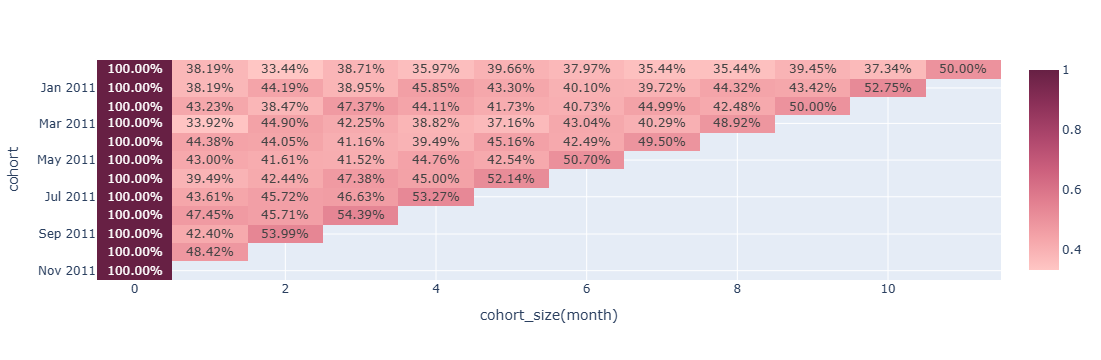

In [118]:
fig = px.imshow(retention_final, text_auto='.2%', color_continuous_scale='Burg')
fig.show()

## RM Analysis 

In [132]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date_ymd,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010


In [134]:
today_date = max(data['date_ymd'])
today_date

Timestamp('2011-12-09 00:00:00')

In [225]:
rm = data.groupby('CustomerID').agg({'InvoiceDate' : lambda x:(today_date - x.max()).days,
                                      'CustomerID' : lambda x: x.count(),
                                      'amount' : lambda x: x.sum()})
rm.columns = ['recency', 'frequency', 'monetary']
rm.head()

,recency,frequency,monetary
CustomerID,,,
12346,324,2,0.00
12347,1,182,4310.00
12348,74,31,1797.24
12349,17,73,1757.55
12350,309,17,334.40


In [231]:
rm['recency_score'] = pd.qcut(rm['recency'], 3, labels = [3,2,1]) # 1 > 2 > 3
rm['monetary_score'] = pd.qcut(rm['monetary'], 3, labels = [3,2,1]) # 1 > 2 > 3
rm['rm_score'] = rm['recency_score'].astype(str) + rm['monetary_score'].astype(str)
rm.reset_index(inplace = True)
rm



,CustomerID,recency,frequency,monetary,recency_score,monetary_score,rm_score
0,12346,324,2,0.00,1,3,13
1,12347,1,182,4310.00,3,1,31
2,12348,74,31,1797.24,2,1,21
3,12349,17,73,1757.55,3,1,31
4,12350,309,17,334.40,1,3,13
...,...,...,...,...,...,...,...
4367,18280,276,10,180.60,1,3,13
4368,18281,179,7,80.82,1,3,13
4369,18282,6,13,176.60,3,3,33
4370,18283,2,756,2094.88,3,1,31


In [257]:
def customer_rm(score):
    if score == '11':
        return "Excellent"
    elif score in ['12', '22', '21']:
        return "Good"
    elif score == '33':
        return "Dormant"
    elif score in ['21','31']:
        return "Prevention"
    elif score in ['13', '23']:
        return "Need strategy"

rm['Category'] = rm['rm_score'].apply(customer_rm)
rm



,CustomerID,recency,frequency,monetary,recency_score,monetary_score,rm_score,Category
0,12346,324,2,0.00,1,3,13,Need strategy
1,12347,1,182,4310.00,3,1,31,Prevention
2,12348,74,31,1797.24,2,1,21,Good
3,12349,17,73,1757.55,3,1,31,Prevention
4,12350,309,17,334.40,1,3,13,Need strategy
...,...,...,...,...,...,...,...,...
4367,18280,276,10,180.60,1,3,13,Need strategy
4368,18281,179,7,80.82,1,3,13,Need strategy
4369,18282,6,13,176.60,3,3,33,Dormant
4370,18283,2,756,2094.88,3,1,31,Prevention


In [263]:
rm_score = rm.groupby('rm_score')[['CustomerID']].nunique().reset_index().rename({'CustomerID':'customer_count'}, axis=1)
rm_score['category'] = rm_score['rm_score'].apply(customer_rm)
rm_score

,rm_score,customer_count,category
0,11,162,Excellent
1,12,481,Good
2,13,811,Need strategy
3,21,466,Good
4,22,546,Good
5,23,409,Need strategy
6,31,830,Prevention
7,32,430,None
8,33,237,Dormant


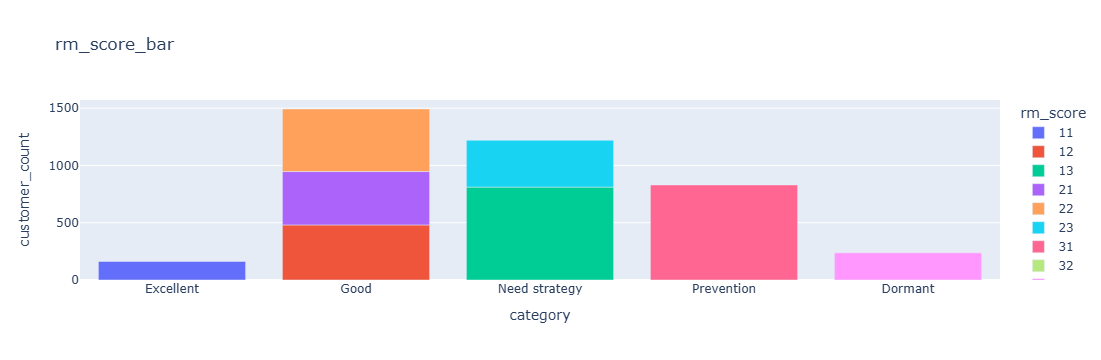

In [271]:
fig = px.bar(rm_score, x = 'category', y = 'customer_count', title = 'rm_score_bar', color = 'rm_score')
fig.show()